In [ ]:
import numpy as numpy
import pandas as pd
from typing import List, Dict
from fetch_products import load_data
import os
import matplotlib.pyplot as plt
import seaborn as sns

products = load_data('../data/products.json')
if products:
    print(f"{len(products)} loaded data.")
    print(products[0])  # first product view
else:
    print("None")

194 loaded data.
{'id': 1, 'title': 'Essence Mascara Lash Princess', 'description': 'The Essence Mascara Lash Princess is a popular mascara known for its volumizing and lengthening effects. Achieve dramatic lashes with this long-lasting and cruelty-free formula.', 'category': 'beauty', 'price': 9.99, 'discountPercentage': 10.48, 'rating': 2.56, 'stock': 99, 'tags': ['beauty', 'mascara'], 'brand': 'Essence', 'sku': 'BEA-ESS-ESS-001', 'weight': 4, 'dimensions': {'width': 15.14, 'height': 13.08, 'depth': 22.99}, 'warrantyInformation': '1 week warranty', 'shippingInformation': 'Ships in 3-5 business days', 'availabilityStatus': 'In Stock', 'reviews': [{'rating': 3, 'comment': 'Would not recommend!', 'date': '2025-04-30T09:41:02.053Z', 'reviewerName': 'Eleanor Collins', 'reviewerEmail': 'eleanor.collins@x.dummyjson.com'}, {'rating': 4, 'comment': 'Very satisfied!', 'date': '2025-04-30T09:41:02.053Z', 'reviewerName': 'Lucas Gordon', 'reviewerEmail': 'lucas.gordon@x.dummyjson.com'}, {'rating'

#### Create a pandas dataframe

In [3]:
def get_dataframe(products: List[Dict]) -> pd.DataFrame:
    """
    Convert a list of product dictionaries into a flat pandas DataFrame.
    Reviews are flattened as r.rating0, r.comment0, r.rating1, etc.
    """
    try:
        if not isinstance(products, list):
            raise ValueError("Input must be a list of product dictionaries.")

        rows = []

        for product in products:
            row = {
                "id": product.get("id"),
                "title": product.get("title"),
                "description": product.get("description"),
                "category": product.get("category"),
                "price": product.get("price"),
                "discountPercentage": product.get("discountPercentage"),
                "rating": product.get("rating"),
                "stock": product.get("stock"),
                "weight": product.get("weight"),
                "width": product.get("dimensions", {}).get("width"),
                "height": product.get("dimensions", {}).get("height"),
                "depth": product.get("dimensions", {}).get("depth"),
                "warrantyInformation": product.get("warrantyInformation"),
                "shippingInformation": product.get("shippingInformation"),
                "availabilityStatus": product.get("availabilityStatus"),
                "returnPolicy": product.get("returnPolicy"),
                "minimumOrderQuantity": product.get("minimumOrderQuantity"),
                "barcode": product.get("meta", {}).get("barcode"),
                "images_link": ", ".join(product.get("images", [])),
                "thumbnail_link": product.get("thumbnail")
            }

            # Flatten all reviews as columns: r.rating0, r.comment0, ...
            reviews = product.get("reviews", [])
            for i, review in enumerate(reviews):
                row[f"r.rating{i}"] = review.get("rating")
                row[f"r.comment{i}"] = review.get("comment")

            rows.append(row)

        return pd.DataFrame(rows)

    except Exception as e:
        print(f"Error generating DataFrame: {e}")
        return pd.DataFrame()


In [4]:
df = get_dataframe(products)
df.head()


,id,title,description,category,price,discountPercentage,rating,stock,weight,width,...,minimumOrderQuantity,barcode,images_link,thumbnail_link,r.rating0,r.comment0,r.rating1,r.comment1,r.rating2,r.comment2
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,10.48,2.56,99,4,15.14,...,48,5784719087687,https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...,3,Would not recommend!,4,Very satisfied!,5,Highly impressed!
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,18.19,2.86,34,9,9.26,...,20,9170275171413,https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...,5,Great product!,4,Awesome product!,1,Poor quality!
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,9.84,4.64,89,8,29.27,...,22,8418883906837,https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...,4,Would buy again!,5,Highly impressed!,1,Very dissatisfied!
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,12.16,4.36,91,1,18.11,...,40,9467746727219,https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...,4,Great product!,5,Great product!,5,Would buy again!
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,11.44,4.32,79,8,21.63,...,22,4063010628104,https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...,2,Poor quality!,5,Great product!,1,Very unhappy with my purchase!


#### Saving the pandas dataframe

In [17]:
def save_dataframe(df: pd.DataFrame, output_path: str = "../data/products_df.csv") -> None:
    """
    Save a pandas DataFrame to a CSV file.
    
    Args:
        df (pd.DataFrame): The DataFrame to save.
        output_path (str): Destination path for the CSV file.
    """
    try:
        if not isinstance(df, pd.DataFrame) or not isinstance(output_path,str):
            raise ValueError("Input must be a pandas DataFrame. or output_path must be a valid str path")
        
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        df.to_csv(output_path, index=False)
        print(f"DataFrame saved to {output_path}")
    
    except Exception as e:
        print(f"Error saving DataFrame: {e}")


In [18]:
save_dataframe(df,'../data/products_df.csv')

DataFrame saved to ../data/products_df.csv


#### Analysis on products


#### Basic statistics

In [ ]:
# Basic stats
df[["price", "discountPercentage", "rating", "stock"]].describe()

,price,discountPercentage,rating,stock
count,194.000000,194.000000,194.000000,194.000000
mean,1570.102887,10.557835,3.795722,50.407216
std,5509.494435,5.529503,0.728989,30.628209
min,0.790000,0.040000,2.510000,0.000000
25%,11.990000,6.335000,3.180000,25.000000
50%,34.990000,10.765000,3.860000,52.000000
75%,249.990000,14.907500,4.417500,79.000000
max,36999.990000,19.610000,4.990000,100.000000


#### Sorted prices in ascending order

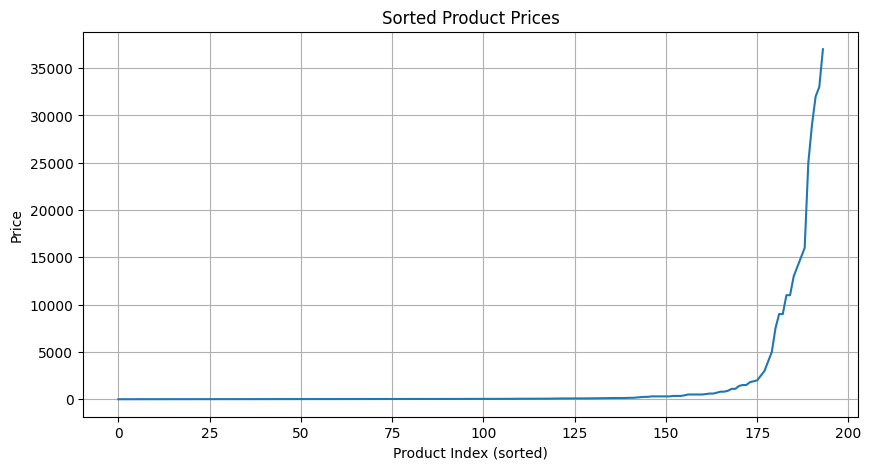

In [ ]:
# Sort prices in ascending order
sorted_prices = df["price"].sort_values().reset_index(drop=True)

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(sorted_prices)
plt.title("Sorted Product Prices")
plt.xlabel("Product Index (sorted)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

#### Cheapest and Most expensive prices

In [13]:
# Top 10 cheapest products
cheapest = df[["id", "title", "price", "category"]].sort_values(by="price", ascending=True).head(10)
print("Cheapest 10 Products:")
display(cheapest)

# Top 10 most expensive products
most_expensive = df[["id", "title", "price", "category"]].sort_values(by="price", ascending=False).head(10)
print("Most Expensive 10 Products:")
display(most_expensive)


Cheapest 10 Products:


,id,title,price,category
30,31,Lemon,0.79,groceries
25,26,Green Chili Pepper,0.99,groceries
41,42,Water,0.99,groceries
24,25,Green Bell Pepper,1.29,groceries
20,21,Cucumber,1.49,groceries
15,16,Apple,1.99,groceries
38,39,Soft Drinks,1.99,groceries
36,37,Red Onions,1.99,groceries
34,35,Potatoes,2.29,groceries
29,30,Kiwi,2.49,groceries


Most Expensive 10 Products:


,id,title,price,category
169,170,Durango SXT RWD,36999.99,vehicle
167,168,Charger SXT RWD,32999.99,vehicle
170,171,Pacifica Touring,31999.99,vehicle
166,167,300 Touring,28999.99,vehicle
168,169,Dodge Hornet GT Plus,24999.99,vehicle
190,191,Rolex Cellini Moonphase,15999.99,womens-watches
114,115,MotoGP CI.H1,14999.99,motorcycle
97,98,Rolex Submariner Watch,13999.99,mens-watches
95,96,Rolex Cellini Moonphase,12999.99,mens-watches
191,192,Rolex Datejust Women,10999.99,womens-watches


#### Average rating producs by category

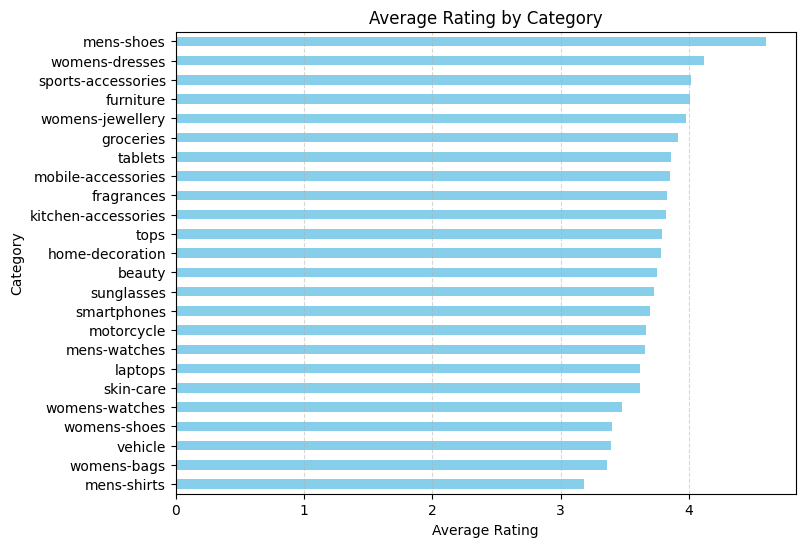

In [16]:
avg_rating = df.groupby("category")["rating"].mean().sort_values()

avg_rating.plot(kind="barh", figsize=(8, 6), title="Average Rating by Category", color="skyblue")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


In [20]:
# Group by category and aggregate the desired statistics
summary_df_category = (
    df.groupby("category")
    .agg(
        avg_rating=("rating", "mean"),
        min_price=("price", "min"),
        max_price=("price", "max"),
        avg_price=("price", "mean"),
        avg_discount=("discountPercentage", "mean"),
        min_discount=("discountPercentage", "min"),
        max_discount=("discountPercentage", "max"),
    )
    .reset_index()
)

# Display the summary
summary_df_category.head()


,category,avg_rating,min_price,max_price,avg_price,avg_discount,min_discount,max_discount
0,beauty,3.748000,8.99,19.99,13.390000,12.422,9.84,18.19
1,fragrances,3.826000,49.99,129.99,83.990000,9.626,0.62,16.51
2,furniture,4.006000,299.99,2499.99,1199.990000,10.574,2.01,19.09
3,groceries,3.911481,0.79,19.99,5.467778,9.220,0.16,17.48
4,home-decoration,3.784000,14.99,59.99,38.990000,9.334,6.84,14.87


#### DF summary information on categories

In [21]:
summary_df_category

,category,avg_rating,min_price,max_price,avg_price,avg_discount,min_discount,max_discount
0,beauty,3.748000,8.99,19.99,13.390000,12.422000,9.84,18.19
1,fragrances,3.826000,49.99,129.99,83.990000,9.626000,0.62,16.51
2,furniture,4.006000,299.99,2499.99,1199.990000,10.574000,2.01,19.09
3,groceries,3.911481,0.79,19.99,5.467778,9.220000,0.16,17.48
4,home-decoration,3.784000,14.99,59.99,38.990000,9.334000,6.84,14.87
5,kitchen-accessories,3.820667,3.99,89.99,17.690000,9.628333,0.63,18.91
6,laptops,3.622000,1099.99,1999.99,1559.990000,8.730000,4.69,11.89
7,mens-shirts,3.180000,19.99,34.99,27.590000,10.800000,0.94,19.50
8,mens-shoes,4.602000,79.99,149.99,109.990000,6.274000,0.04,18.04
9,mens-watches,3.660000,89.99,13999.99,8098.323333,9.735000,3.73,17.52


#### In stock / Out of stock Checking

In [22]:
df["availabilityStatus"].value_counts()


availabilityStatus
In Stock        176
Low Stock        14
Out of Stock      4
Name: count, dtype: int64

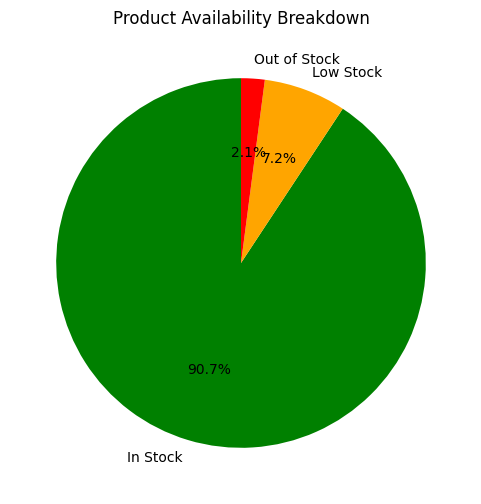

In [24]:
availability_counts =  df["availabilityStatus"].value_counts()
availability_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6),
    colors=["green", "orange", "red"],
    startangle=90,
    title="Product Availability Breakdown"
)
plt.ylabel("")  # Hide y-axis label
plt.show()



#### Products with return Policy

In [ ]:
df["returnPolicy"].value_counts()

returnPolicy
7 days return policy     50
No return policy         44
60 days return policy    35
90 days return policy    34
30 days return policy    31
Name: count, dtype: int64

In [26]:
df["has_return_policy"] = df["returnPolicy"].apply(lambda x: x.strip().lower() != "no return policy")

# Count how many products have / don't have a return policy
counts = df["has_return_policy"].value_counts()
print(counts)


has_return_policy
True     150
False     44
Name: count, dtype: int64


#### Analysis of reviews comments

In [28]:
# Get all review comment columns (they start with 'r.comment')
review_cols = [col for col in df.columns if col.startswith("r.comment")]


In [30]:
import re

# Regex to detect URLs
url_pattern = re.compile(r"http\S+|www\S+|https\S+")

# Regex to detect emojis (basic version)
emoji_pattern = re.compile("[\U0001F600-\U0001F64F"  # emoticons
                           "\U0001F300-\U0001F5FF"  # symbols & pictographs
                           "\U0001F680-\U0001F6FF"  # transport & map symbols
                           "\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)


#### There is no emoji and hyperlink in any comment

In [ ]:
url_count = 0
emoji_count = 0

for col in review_cols:
    url_count += df[col].dropna().apply(lambda x: bool(url_pattern.search(x))).sum()
    emoji_count += df[col].dropna().apply(lambda x: bool(emoji_pattern.search(x))).sum()

print(f"Comments containing URLs: {url_count}")
print(f"Comments containing Emojis: {emoji_count}")

 Comments containing URLs: 0
Comments containing Emojis: 0
